In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('mdl_final.csv')

# How scores compare between genres

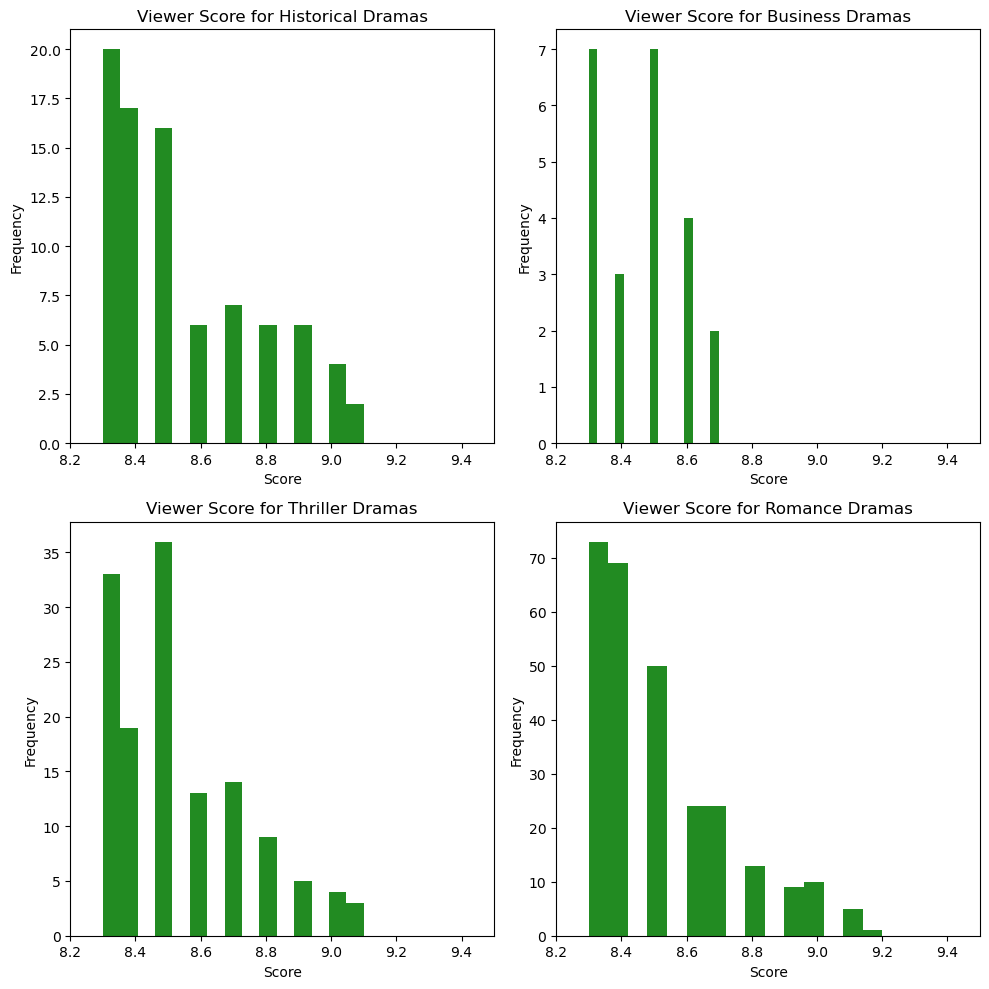

In [42]:
genre1 = 'Historical'
genre2 = 'Business'
genre3 = 'Thriller'
genre4 = 'Romance'

cat1 = df[df[genre1] == 1]['viewer_score']
cat2 = df[df[genre2] == 1]['viewer_score']
cat3 = df[df[genre3] == 1]['viewer_score']
cat4 = df[df[genre4] == 1]['viewer_score']


# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# Creating a histogram
axs[0,0].hist(cat1, bins = 15, color='forestgreen', density=False)
axs[0,0].set_xlabel('Score')
axs[0,0].set_ylabel('Frequency')
axs[0,0].set_title(f'Viewer Score for {genre1} Dramas')
axs[0, 0].set_xlim(8.2, 9.5)

axs[0,1].hist(cat2, bins = 15, color='forestgreen', density=False)
axs[0,1].set_xlabel('Score')
axs[0,1].set_ylabel('Frequency')
axs[0,1].set_title(f'Viewer Score for {genre2} Dramas')
axs[0, 1].set_xlim(8.2, 9.5)

axs[1,0].hist(cat3, bins = 15, color='forestgreen', density=False)
axs[1,0].set_xlabel('Score')
axs[1,0].set_ylabel('Frequency')
axs[1,0].set_title(f'Viewer Score for {genre3} Dramas')
axs[1, 0].set_xlim(8.2, 9.5)

axs[1,1].hist(cat4, bins = 15, color='forestgreen', density=False)
axs[1,1].set_xlabel('Score')
axs[1,1].set_ylabel('Frequency')
axs[1,1].set_title(f'Viewer Score for {genre4} Dramas')
axs[1, 1].set_xlim(8.2, 9.5)

plt.tight_layout()
plt.show()


These graphs show that while there are differenes in the genres, most of them have a similar range of scores. Business dramas (for example, a show about an office romance, or about a CEO) seem to have the lowest ratings, with none rated above 8.7.

# Streaming Service vs. Score
Are some streaming services more worth it than other? How does average score compare across the four most popular streaming services?

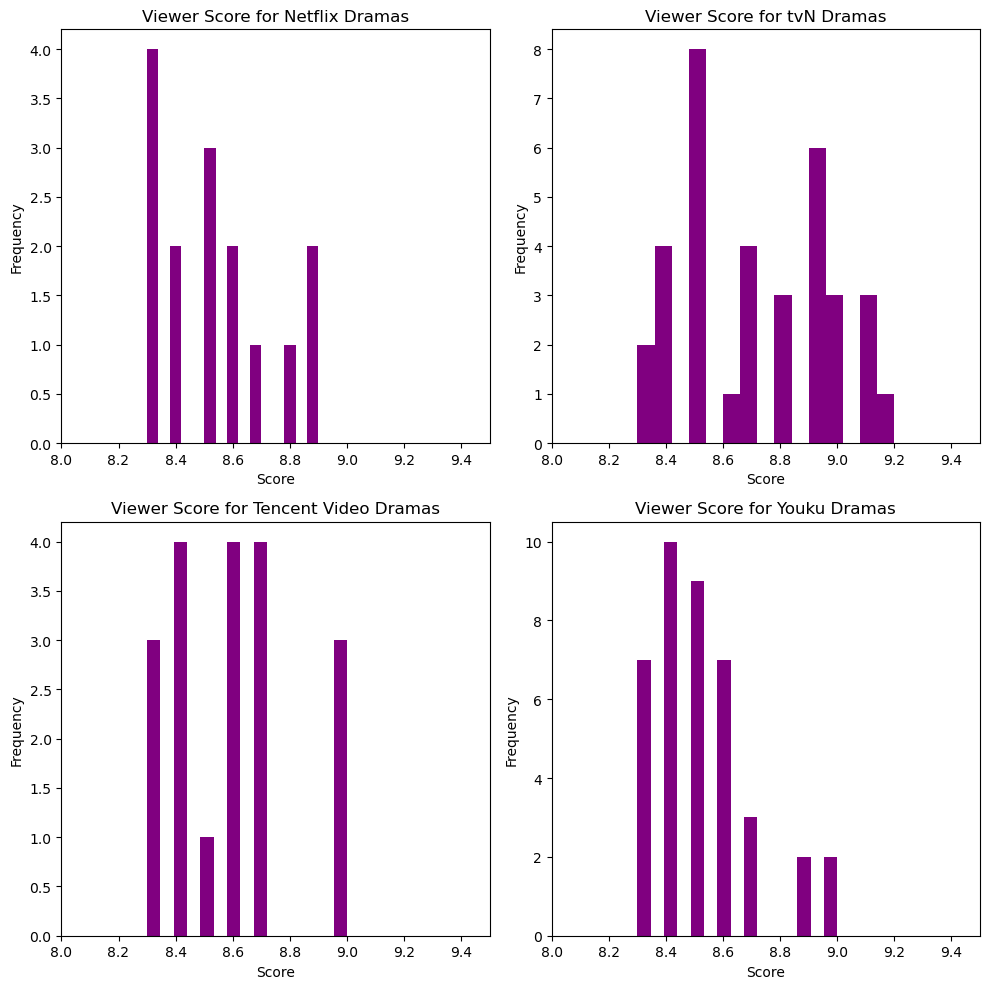

In [48]:
network1 = 'Netflix'
network2 = 'tvN'
network3 = 'Tencent Video'
network4 = 'Youku'

net1 = df[df[network1] == 1]['viewer_score']
net2 = df[df[network2] == 1]['viewer_score']
net3 = df[df[network3] == 1]['viewer_score']
net4 = df[df[network4] == 1]['viewer_score']


# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# Creating a histogram
axs[0,0].hist(net1, bins = 15, color='purple', density=False)
axs[0,0].set_xlabel('Score')
axs[0,0].set_ylabel('Frequency')
axs[0,0].set_title(f'Viewer Score for {network1} Dramas')
axs[0, 0].set_xlim(8.0, 9.5)

axs[0,1].hist(net2, bins = 15, color='purple', density=False)
axs[0,1].set_xlabel('Score')
axs[0,1].set_ylabel('Frequency')
axs[0,1].set_title(f'Viewer Score for {network2} Dramas')
axs[0, 1].set_xlim(8.0, 9.5)

axs[1,0].hist(net3, bins = 15, color='purple', density=False)
axs[1,0].set_xlabel('Score')
axs[1,0].set_ylabel('Frequency')
axs[1,0].set_title(f'Viewer Score for {network3} Dramas')
axs[1, 0].set_xlim(8.0, 9.5)

axs[1,1].hist(net4, bins = 15, color='purple', density=False)
axs[1,1].set_xlabel('Score')
axs[1,1].set_ylabel('Frequency')
axs[1,1].set_title(f'Viewer Score for {network4} Dramas')
axs[1, 1].set_xlim(8.0, 9.5)

plt.tight_layout()
plt.show()

Once again, there doesn't seem to be a significant difference between these four popular services. tvN has the highest scores around 9.2, but this isn't enough to convince me to change my subscriptions. 

# Relationship between eipsode length and rating

Are long shows worth it? Should producers tack on extra seasons, or leave off with the more standard 12-20 episodes?

Text(0.5, 1.0, 'Viewer Score vs Episode')

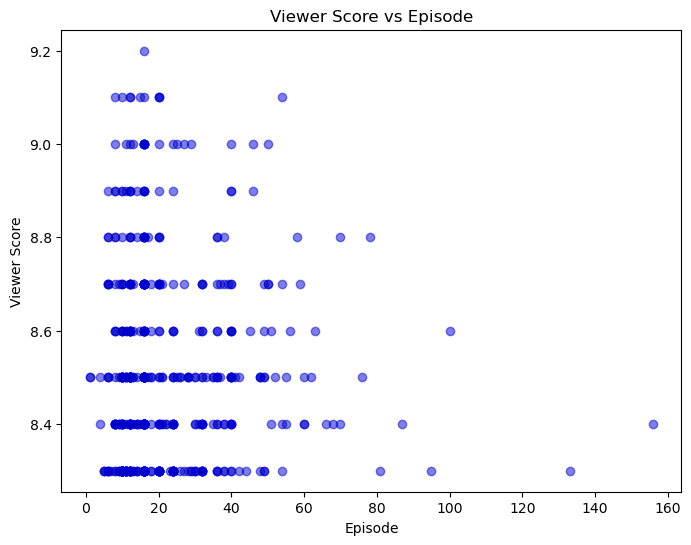

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(df['episodes'], df['viewer_score'], color='mediumblue', alpha=0.5)

# Labeling axes and title
plt.xlabel('Episode')
plt.ylabel('Viewer Score')
plt.title('Viewer Score vs Episode')


It appears that shows with more than 60 episodes have lower ratings. However, most shows have less than 20 episodes, and for that range, there doesn't seem to be a clear relationship between number of episodes and overal score.

# Did veiwership increase after COVID-19?

I'm curious to know if more people started watching dramas during the pandemic when they had lots of time. I'm looking to see any significant changes around the years 2020 and 2021.

Text(0.5, 1.0, 'Watchers per Show Through the Years')

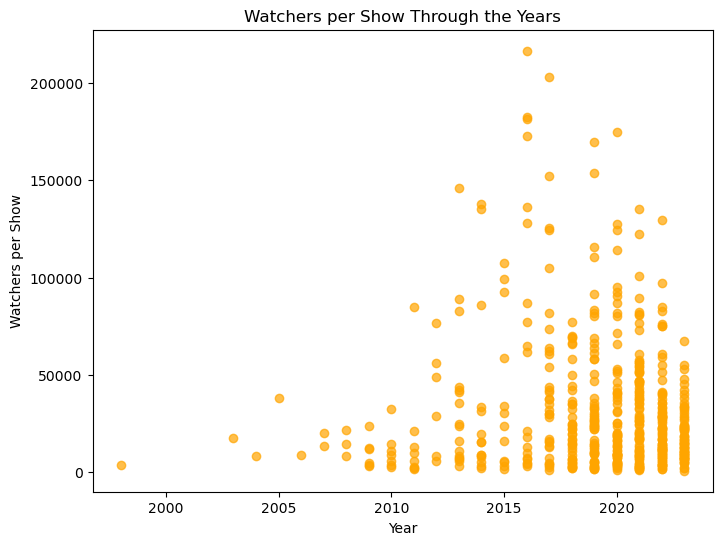

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(df['year'], df['watchers'], color='orange', alpha=0.7)

# Labeling axes and title
plt.xlabel('Year')
plt.ylabel('Watchers per Show')
plt.title('Watchers per Show Through the Years')

This shows us that the most watched dramas to date were made around 2015. However this doesn't acount for shows that had lots of viewers, but haven't had as many years to accumulate views. We see that more dramas were produced starting around 2019, but no siginifcant patterns have emerged around 2020. 

# countries balabl

Text(0.5, 1.0, 'Average Score per Country')

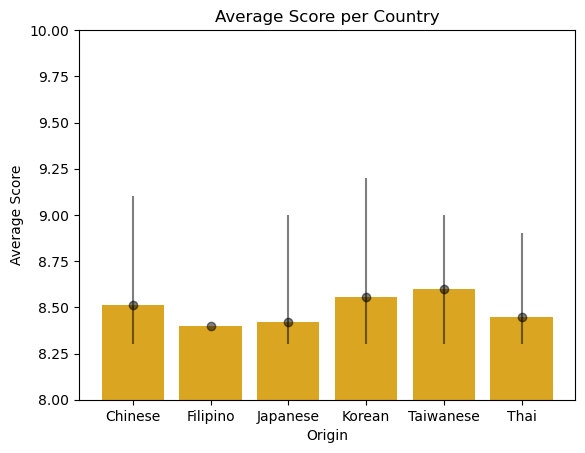

In [54]:
# Plotting the average watchers per year
avg_score_country = df.groupby('country')['viewer_score'].mean().reset_index()
# Calculate min/max score per country
min_score_country = df.groupby('country')['viewer_score'].min().reset_index()
max_score_country = df.groupby('country')['viewer_score'].max().reset_index()

fig, ax = plt.subplots()
ax.bar(avg_score_country['country'], avg_score_country['viewer_score'], color='goldenrod')
ax.errorbar(avg_score_country['country'], avg_score_country['viewer_score'], 
             yerr=[avg_score_country['viewer_score'] - min_score_country['viewer_score'], 
                   max_score_country['viewer_score'] - avg_score_country['viewer_score']], 
             fmt='o', color='black', label='Min/Max Range', alpha=0.5)

ax.set_xlabel('Origin')
ax.set_ylabel('Average Score')
ax.set_ylim(8, 10)

ax.set_title('Average Score per Country')

We see here that Korean Dramas and Taiwanese Dramas have the highest average scores for their dramas.

# most popular network

Which streaming service had the most dramas in the top 500? 

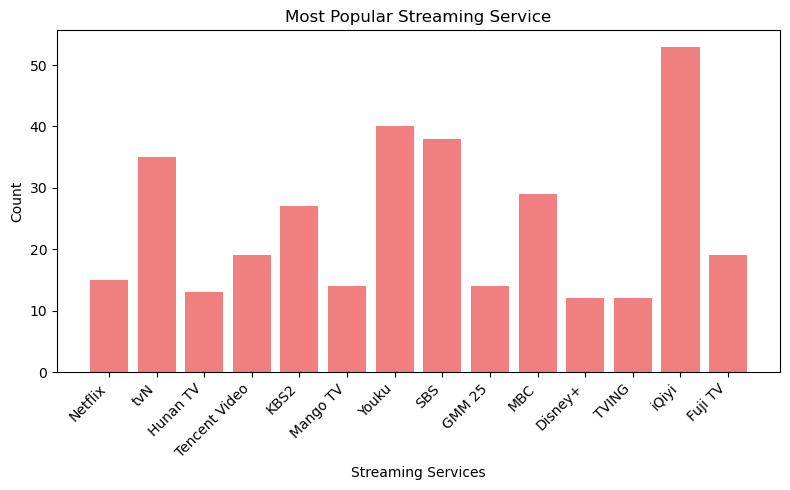

In [80]:
genres_cols = df.iloc[:, 40:]
column_sums = genres_cols.sum()
selected_columns = column_sums[column_sums >= 12]

bar_keys = list(selected_columns.keys())
bar_values = list(selected_columns)

plt.figure(figsize=(8, 5))  # Setting figure size

# Creating bar plot using bar function with converted lists
plt.bar(bar_keys, bar_values, color='lightcoral')

# Adding labels and title
plt.xlabel('Streaming Services')
plt.ylabel('Count')
plt.title('Most Popular Streaming Service')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.tight_layout()
plt.show()

iQiyi, Youku, and SBS, and tvN had the highest number of dramas in the top 500. (Note: data was filtered to include networks with at least 12 occurences)

# most popular genre

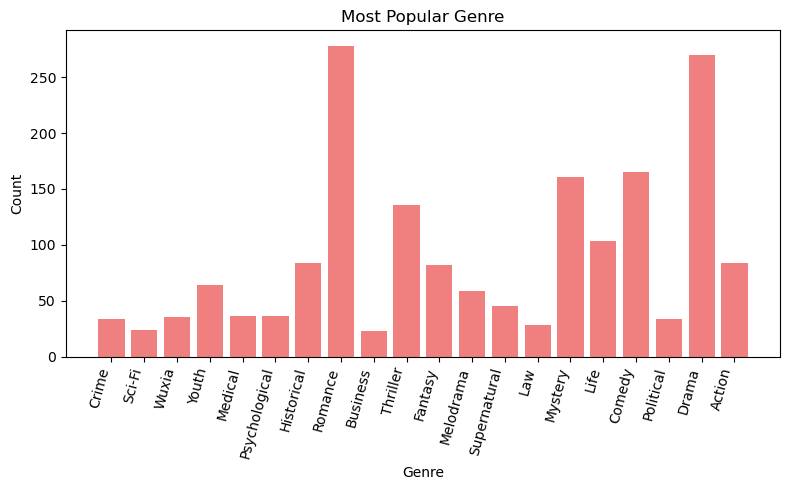

In [86]:
network_cols = df.iloc[:, 9:41]
column_sums = network_cols.sum()
selected_columns = column_sums[column_sums >= 20]

bar_keys = list(selected_columns.keys())
bar_values = list(selected_columns)

plt.figure(figsize=(8, 5))  # Setting figure size

# Creating bar plot using bar function with converted lists
plt.bar(bar_keys, bar_values, color='lightcoral')

# Adding labels and title
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Most Popular Genre')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=75, ha='right')

# Displaying the plot
plt.tight_layout()
plt.show()

Romance and Drama are the most popular genres. This is expected. However, mystery and thriller were some of the next most popular, which I found suprising. (Note: data was filtered to include genres with at least 20 occurences)